In [1]:
#Gregory Sylvester
#CSI-5810 hw2

#librarys
import numpy as np
import numpy.linalg as linalg
#import pytorch as torch
import matplotlib as plt
import matplotlib.pyplot as plt2
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import math
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#import the datetime to parse the date to match them on the csv files
from datetime import datetime

#file directory for stored files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!jupyter nbconvert --to html '/content/drive/MyDrive/Colab Notebooks/Copy of CSI5810HW2.ipynb'

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Copy of CSI5810HW2.ipynb to html
[NbConvertApp] Writing 737129 bytes to /content/drive/MyDrive/Colab Notebooks/Copy of CSI5810HW2.html


# **Problem 1 | Part A**
---

In this exercise, you will use regression to build a model for stock prediction.
You will work with a stock of your own choice. You will download the closing
price of the stock your choice along with the closing price of S&P index for
this year from the beginning of the year to the September end. Your model
will use the closing prices of the stock of your choice and S&P of a day to
predict the closing price of the stock for the next day. Make sure the draw the
actual versus predicted stock price for your model. Also create a table of
actual and predicted prices using your model for the first week of October.

In [ ]:
#import CSX and S&P 2023 daily general stock prices below

#import the data from greg's drive (if you try to run this the file path needs to be changed)
df = pd.read_csv('/content/drive/My Drive/HW Files/CSI5810/HW2/CSX.csv')

#dump the dataframe to a numpy array
csx_matrix = df.to_numpy()[:,[0,5]]

#import the data from greg's drive (if you try to run this the file path needs to be changed)
df = pd.read_csv('/content/drive/My Drive/HW Files/CSI5810/HW2/SAndP.csv')

#dump the dataframe to a numpy array
sp_matrix = df.to_numpy()[:,[0,5]]

In [ ]:
#clean the data of irrlevent values and make the normalize

#clean date for both the matrixes

i = 0

for i in range(sp_matrix.shape[0]):
  if type(sp_matrix[i,0]) == 'str':
    sp_matrix[i,0] = datetime.strptime(sp_matrix[i,0], '%d-%b-%y')
  sp_matrix[i,1] = sp_matrix[i,1].replace(",", "")

i = 0
for i in range(csx_matrix.shape[0]):
  if type(csx_matrix[i,0]) == 'str':
    csx_matrix[i,0] = datetime.strptime(csx_matrix[i,0], '%Y-%m-%d')


In [ ]:
sp_matrix[:,1].astype(np.float64)
csx_matrix[:,1].astype(np.float64)

cls_matrix = sp_matrix[:,:]

cls_matrix = np.append(cls_matrix[:],csx_matrix[:,:], axis = 1)
cls_matrix = cls_matrix[:,[1,3]].astype(np.float64)


print(cls_matrix.shape,np.transpose(csx_matrix[:,1]).shape)


(188, 2) (188,)


In [ ]:
#normalize data
cls_norm = np.linalg.norm(cls_matrix , ord = 2, axis = 1)
cls_cov = np.cov(cls_matrix, rowvar = False)

In [ ]:
print(cls_norm)

print(cls_cov)

[4288.49881599 4288.16166213 4299.80874075 4274.6287018  4273.64828698
 4337.55843735 4320.17928109 4330.11930084 4402.31683915 4444.06703027
 4453.6441428  4450.42945613 4505.21130109 4467.55252002 4462.01132796
 4487.56513696 4457.58979697 4451.23947582 4465.57784221 4496.93404122
 4515.87814345 4507.77565955 4514.98287174 4497.74176475 4433.42509071
 4405.82338568 4376.41836344 4436.11994846 4387.66158573 4399.87994301
 4369.82232485 4370.46837158 4404.43822816 4437.9631854  4489.81803178
 4464.15298284 4468.93354504 4467.81445172 4499.48183755 4518.54388409
 4478.1376941  4501.99623478 4513.49185467 4576.8249317  4589.05841393
 4582.32526538 4537.50446864 4566.84114446 4567.55238898 4554.73088433
 4536.43346838 4534.96084011 4565.81191949 4555.07302242 4522.87721797
 4505.5062592  4510.12721737 4472.2510971  4439.35408489 4409.62786862
 4399.04750814 4411.69015075 4446.91876088 4455.6863339  4450.47501403
 4396.54103361 4376.96128285 4378.51341915 4328.9235711  4348.43489175
 4381.

In [ ]:
#below is a closed form solution to finding the weight and bias to the linear equation
def linear_reg2d(v_1, v_2):

  #implementation:
  #y_hat = v_2_i+1 = w_1 * v_1_i + w_2 * v_2_i + bias

  #below we create a extend matrix for calulating the weights and bias for the 1d linear regression function
  one_vector = np.ones(shape =(v_1.shape[0]))

  v_1_extend = np.transpose(np.vstack((np.vstack((v_1,v_2)), one_vector)))

  #below is the implementation of closed form solution

  l1 = np.matmul(np.transpose(v_1_extend),v_1_extend)
  l1 = np.matmul((np.linalg.inv(l1)),np.transpose(v_1_extend))
  w_extend = np.dot(l1[:,:-1],np.transpose(v_2[1:]))
  print(w_extend)
  return w_extend[:-1], w_extend[-1], v_1_extend[:,:-1]

'''
#Below is working code segment

#below is a closed form solution to finding the weight and bias to the linear equation
def linear_reg1d(v_1, v_2):

  #below we create a extend matrix for calulating the weights and bias for the 1d linear regression function
  one_vector = np.ones(shape =(v_1.shape[0]))

  v_1_extend = np.transpose(np.vstack((v_1, one_vector)))

  #below is the implementation of closed form solution

  l1 = np.matmul(np.transpose(v_1_extend),v_1_extend)
  l1 = np.matmul((np.linalg.inv(l1)),np.transpose(v_1_extend))
  w_extend = np.matmul(l1,v_2)

  return w_extend[0], w_extend[1]
'''
def predict_values(input_matrix_1, input_matrix_2,weight, bias):
  print(weight)
  predicted_output_matrix = weight[0] * input_matrix_1[:-1] + weight[1] * input_matrix_2[:-1] + bias
  return predicted_output_matrix

def r_square(input_matrix, predicted_input_matrix):
  corr_matrix = np.corrcoef(input_matrix, predicted_input_matrix)
  corr = corr_matrix[0,1]
  R_sq = corr**2
  return R_sq

In [ ]:
x_test = cls_matrix[150:,1]
y_test = cls_matrix[150:,0]
x_train = cls_matrix[:150,1]
y_train = cls_matrix[:150,0]

weight, bias, test_set = linear_reg2d(x_train,y_train)
print(weight, bias)
y_hat = predict_values(x_test, y_test, weight, bias)
r_sq = r_square(y_test[:-1], y_hat)
print(r_sq)

[ 5.44876854e+01  1.50391201e+00 -3.88901036e+03]
[54.48768541  1.50391201] -3889.010361187022
[54.48768541  1.50391201]
0.9728909311770553


In [ ]:
print(x_test.shape, y_test.shape, y_hat.shape, y_test.mean(), y_hat.mean(), y_test.std(), y_hat.std())

print(np.transpose(y_test[:-1] - y_hat))



(38,) (38,) (37,) 4019.9207894736846 3830.9685952219493 95.24224906663781 132.08798468972665
[193.26367851 209.72701362 197.65150085 204.56919323 230.71761212
 194.40909751 184.3614367  122.96708269 137.43387064 147.70785661
 144.70249809 173.10642215 135.78176466 115.24584103 147.8851508
 130.18183958 137.2509466  144.33322301 204.49111589 244.48891964
 230.96444916 211.00468804 220.75052482 198.04271803 201.50542137
 195.8666636  243.38792813 214.64360738 193.6982927  167.81150751
 191.63516098 188.66036996 216.76181752 259.32648648 276.34560261
 304.37449491 271.95617967]


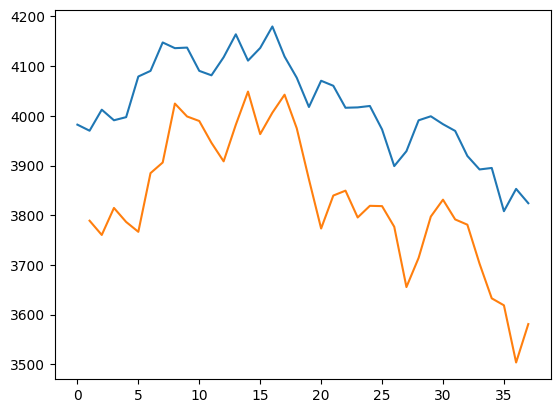

In [ ]:
#using closing price of the S&P500 and teh CSX closeing prices we predict the following days for the last 37 days
plt.pyplot.plot(range(y_test.shape[0]), y_test)
plt.pyplot.plot(range(1, 1+y_hat.shape[0]), y_hat)

# **Problem 2**
---
In this exercise, you will build a linear predictive model to predict crime rate
based on several factors. The data is in the “crime-rate” file. You will build the
model by writing your own script for gradient search. Experiment with 2-3
learning rates to see the effect of learning rate on the search.

In [ ]:
#import the data from greg's drive (if you try to run this the file path needs to be changed)
df = pd.read_csv('/content/drive/My Drive/HW Files/CSI5810/HW2/crimerate.csv')

#dump the dataframe to a numpy array
cr_matrix = df.to_numpy()

#below are some of the details about the matrix
#when building the model/cleaning the data described below we need to keep these attributes in mind
'''
The data (X1, X2, X3, X4, X5, X6, X7) are for each city.
X1 = total overall reported crime rate per 1 million residents
X2 = reported violent crime rate per 100,000 residents
X3 = annual police funding in $/resident
X4 = % of people 25 years+ with 4 yrs. of high school
X5 = % of 16 to 19 year-olds not in highschool and not highschool graduates.
X6 = % of 18 to 24 year-olds in college
X7 = % of people 25 years+ with at least 4 years of college


The goal is to build a linear predictive model to predict reported crime rate (X1)
'''
cr_matrix = cr_matrix.astype(np.float64, casting='unsafe')


In [ ]:
cr_matrix[:, -4:] *= 1000
cr_matrix[:, 1] *= 1
cr_matrix[:, 2] *= 100000
cr_matrix[:, 0] *= .1


In [ ]:
#declare weight and bias matrix

x_matrix = cr_matrix[:,1:]
y_matrix = cr_matrix[:,:1]
weight_matrix = np.random.rand(1,6)



In [ ]:
alpha = .005

in_matrix = weight_matrix
for i in range(5):
  error = np.transpose(y_matrix) - np.matmul(in_matrix, np.transpose(x_matrix))

  grad_old = -np.matmul(error, x_matrix)

  print(linalg.norm(error))
  in_matrix_comp = in_matrix - alpha*grad_old

  in_matrix = - in_matrix_comp

print(in_matrix)

#Using different alpha values as the learning rate can 'overshoot' or 'undershoot' the minimum calculate error


11078084.472887661
4.379204943355178e+19
1.7313283546324577e+32
6.844844921230364e+44
2.7061245702083624e+57
[[6.51540703e+58 3.80424715e+62 5.23933585e+60 1.43922879e+60
  2.52333988e+60 1.23815644e+60]]


In [ ]:
#calculate the expected value

# **Problem 3**
---
In this exercise, you will use “Wheat Data” posted at Moodle. The data consists of 32 training examples each from three classes. Using these training examples, you will perform classification of 3 test examples by k-NN classification (k= 1, 3, and 5), weighted k-NN (3 and 5) and by Naïve Bayes classifier. You will write your own code to implement k-NN and Naive Bayes. Compare and comment on your results.

In [ ]:
df = pd.read_csv('/content/drive/My Drive/HW Files/CSI5810/HW2/wheatTrainData.csv')

#dump the dataframe to a numpy array
train_matrix = df.to_numpy()

df = pd.read_csv('/content/drive/My Drive/HW Files/CSI5810/HW2/wheatTestData.csv',header=None)

#dump the dataframe to a numpy array
test_matrix = df.to_numpy()

train_data = train_matrix[:,:-1]
train_class = train_matrix[:,-1:]

# **K-NN**

In [ ]:

#calculate distance
def kNN(k, train_class, test_matrix,train_data,weighted = False):
  pred_class = []
  i = 0
  for i in range(test_matrix.shape[0]):
    pred = []
    dists = []
    m=0
    for m in range(train_matrix.shape[0]):
      dists.append(linalg.norm(test_matrix[i,:] - train_data[m,:], ord = 2, axis = 0))

    if(weighted == False):
      knn = train_class[(np.argsort(dists)[:k])]
      unique, counts = np.unique(knn, return_counts=True)
      pred_class.append(unique[np.argmax(counts)])

    else:
      knn_pos = np.argsort(dists)[:k]
      knn_dists = [1 / d for d in dists]
      knn_weights = [knn_dists[idx] for idx in knn_pos]
      knn_classes = train_class[knn_pos]
      unique, counts = np.unique(knn_classes, return_counts=True)
      weighted_counts = [(np.sum(knn_weights)[knn_classes == c] for c in unique)]

      pred_class.append(unique[np.argmax(weighted_counts)])
  print(pred_class)
  return pred_class


'\n      for i in range(k):\n        knn_dists.append( 1 / dists[knn_pos[i]])\n        unique, counts = np.unique(knn_dists, return_counts=True)\n        pred_class.append(unique[np.argmax(counts)])\n        \n      knn_inv = np.transpose(np.vstack((knn_pos, np.transpose(train_class[knn_pos]))))\n      print(knn_inv)\n      unique, counts = np.unique(knn_inv, return_counts=True)\n      list(unique)\n      i = 0\n      for i in range(unique.size):\n        means.append(np.mean(knn_inv[:,0], where = (knn_inv[:,1] == unique[i])))\n      print(means)\n      pred_class.append(unique[np.argmin(means)[0]])\n'

In [ ]:
kNN(1 ,train_class, test_matrix,train_data)
kNN(3 ,train_class, test_matrix,train_data)
kNN(5 ,train_class, test_matrix,train_data)
#the last value printed is just the return value printed by google colab


[3.0, 2.0, 3.0]
[3.0, 2.0, 3.0]
[3.0, 2.0, 3.0]


[3.0, 2.0, 3.0]

# **K-NN (weighted)**

In [ ]:
kNN(3 ,train_class, test_matrix,train_data, weighted = True)
kNN(5 ,train_class, test_matrix,train_data, weighted = True)

[3.0, 2.0, 1.0]
[3.0, 1.0, 1.0]


[3.0, 1.0, 1.0]

#**Naive Bayers Classification**

In [ ]:
nb_classifier.fit(train_data, train_class)

y_pred = nb_classifier.predict(test_matrix)
print(y_pred)



[3. 2. 3.]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Comment:
It shows that depending on the k value and the distance metric used to calculate the centroids produced by the model can/will change

# **Problem 4**
---
In this exercise, you will again use 32 training examples of wheat data and project them into two-dimensions using the Fisher’s LDA method for multiple classes. You will show your result by creating the scatter plot of the LDA projections. Make sure to color code the project points with their respective class labels.

In [ ]:
bin1 = train_data[:32,:]
bin2 = train_data[32:64,:]
bin3 = train_data[64:,:]
bin1_mean = np.mean(bin1, axis = 0)
bin2_mean = np.mean(bin2, axis = 0)
bin3_mean = np.mean(bin3, axis = 0)
means = np.array((bin1_mean, bin2_mean, bin3_mean))
print(bin1.shape,bin2.shape,bin3.shape)

(32, 7) (32, 7) (31, 7)


In [ ]:
scat_matrix1 = np.cov(np.transpose(bin1))
scat_matrix2 = np.cov(np.transpose(bin2))
scat_matrix3 = np.cov(np.transpose(bin3))
scats = np.array((scat_matrix1, scat_matrix2, scat_matrix3))
tot_scat = scat_matrix1 + scat_matrix2 + scat_matrix3


In [ ]:
inverse_scat = np.linalg.inv(tot_scat)


In [ ]:
def LDApercent(vector, train_matrix, means, scats):
    j = 0

    percent = []
    percentprop = []
    for j in range(3):
        p = (2 * math.pi) ** (j/2)
        h = (p * np.linalg.norm(scats[j]) ** 0.5)
        m = vector - means[j, :]
        out = h * math.exp(np.matmul(np.matmul(np.transpose(-(m)), np.linalg.inv(scats[j])), m)) * (1/3)
        percent.append(out)

    for j in range(3):
        percentprop.append(percent[j] / np.sum(percent))

    return percentprop


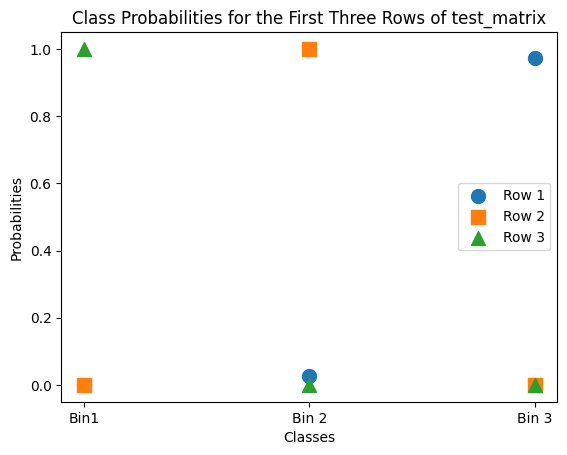

In [ ]:
class_probabilities = []
for i in range(3):
    result = LDApercent(test_matrix[i, :], train_matrix[:,:-1], means, scats)
    class_probabilities.append(result)


class_probabilities = np.array(class_probabilities)

class_labels = ['Bin1', 'Bin 2', 'Bin 3']

plt2.scatter(class_labels, class_probabilities[0], label='Row 1', marker='o', s=100)
plt2.scatter(class_labels, class_probabilities[1], label='Row 2', marker='s', s=100)
plt2.scatter(class_labels, class_probabilities[2], label='Row 3', marker='^', s=100)
plt2.xlabel('Classes')
plt2.ylabel('Probabilities')
plt2.title('Class Probabilities for the First Three Rows of test_matrix')
plt2.legend()
plt2.show()